---

#**Principal Component Analysis (PCA) on Iris Dataset**

---



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [2]:
# Add target (species) column
df['target'] = dataset.target

In [3]:
# Display the first and last few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
print("\nLast 5 rows of the dataset:")
print(df.tail())


Last 5 rows of the dataset:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
145       2  
146       2  
147       2  
148       2  
149       2  


In [5]:
# Standardize the features
X = df.iloc[:, :-1]  # Input features (all columns except 'target')
y = df.iloc[:, -1]   # Target (species)
X = StandardScaler().fit_transform(X)  # Scale the data to have a mean of 0 and variance of 1

In [6]:
# Convert scaled features to DataFrame
X = pd.DataFrame(X, columns=dataset.feature_names)

In [7]:
# Print scaled feature values
print("\nScaled features:")
print(X.head())


Scaled features:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [8]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [9]:
# Convert PCA results to DataFrame
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])

In [10]:
# Add target column to the PCA DataFrame
X_pca['target'] = y
print("\nPCA result with target:")
print(X_pca.head())


PCA result with target:
        PC1       PC2       PC3       PC4  target
0 -2.264703  0.480027 -0.127706 -0.024168       0
1 -2.080961 -0.674134 -0.234609 -0.103007       0
2 -2.364229 -0.341908  0.044201 -0.028377       0
3 -2.299384 -0.597395  0.091290  0.065956       0
4 -2.389842  0.646835  0.015738  0.035923       0


In [11]:
# Display PCA components (loading scores)
print("\nPCA Components (Loading Scores):")
print(pca.components_)


PCA Components (Loading Scores):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [12]:
# Explained variance by each principal component
print("\nExplained Variance by each PC:")
print(pca.explained_variance_)


Explained Variance by each PC:
[2.93808505 0.9201649  0.14774182 0.02085386]


In [13]:
# Proportion of explained variance
print("\nProportion of Explained Variance by each PC:")
print(pca.explained_variance_ratio_)


Proportion of Explained Variance by each PC:
[0.72962445 0.22850762 0.03668922 0.00517871]


In [14]:
# Cumulative sum of explained variance
print("\nCumulative Proportion of Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Cumulative Proportion of Explained Variance:
[0.72962445 0.95813207 0.99482129 1.        ]


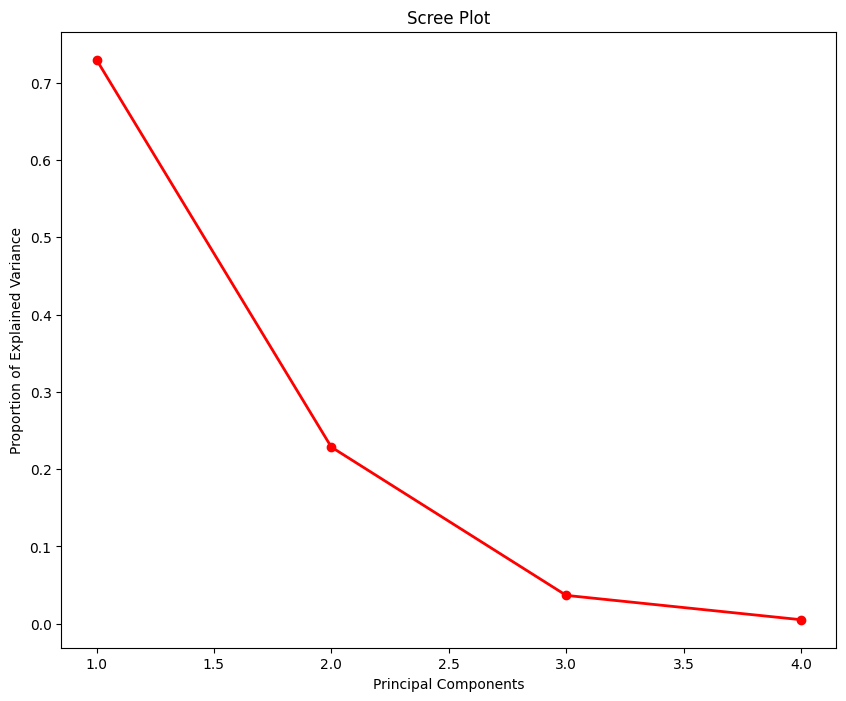

In [16]:
# Scree Plot to show the explained variance of each principal component
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(10, 8))
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.show()

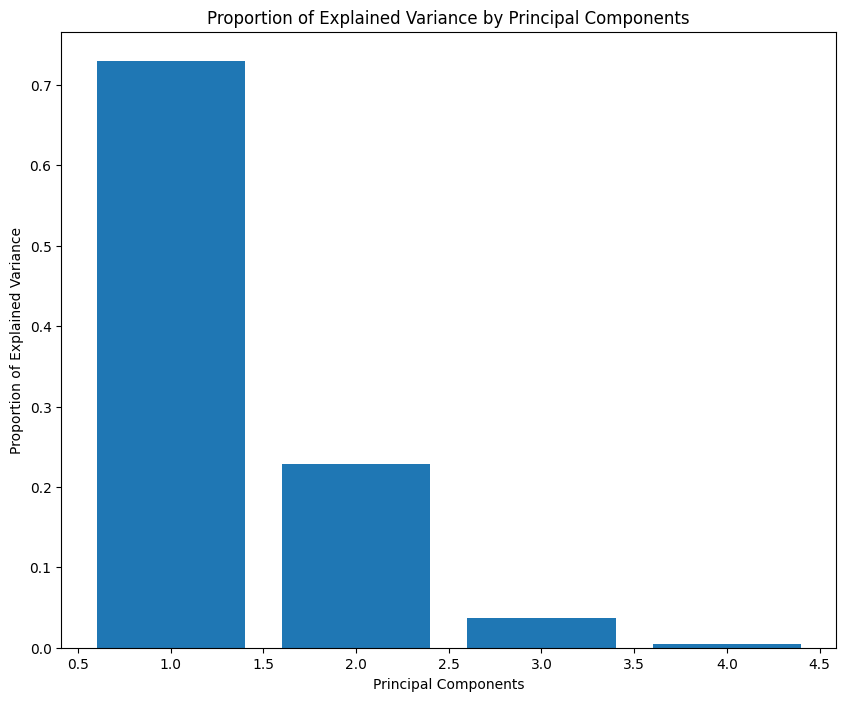

In [18]:
# Bar plot of explained variance ratio
plt.figure(figsize=(10, 8))
plt.bar(PC_values, pca.explained_variance_ratio_)
plt.title("Proportion of Explained Variance by Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.show()



---
## **Conclusion**

After applying Principal Component Analysis (PCA) on the Iris dataset, the first two principal components (PC1 and PC2) capture around 96% of the total variance in the data.

This shows that these two components contain most of the information from the original dataset's four features.

 By reducing the dimensionality, PCA simplifies the dataset while maintaining its essential characteristics, making it easier for visualization and further analysis without substantial loss of information.


---


